# Affine Transformationen mit cupy
Hier wenden wir eine affine Transformation mit [cupy](https://cupy.dev) an.

In [1]:
from skimage.io import imread, imshow

import cupy
from cupyx.scipy import ndimage as ndi

(192, 256, 256)

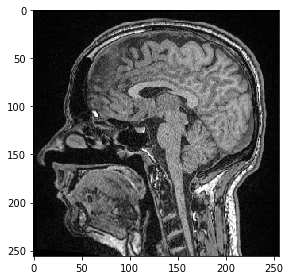

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

imshow(image[100])
image.shape

Analog zu Transformationen in scipy verwendet auch cupy Transformationsmatrizen, um die Transformation zu beschreiben.

In [3]:
import numpy as np

# Skalierung mit Faktor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])

Bevor wir eine cupy-Operation auf ein Bild anwenden können, müssen wir es in den GPU-Speicher übertragen. Wir erhalten einen Handle auf ein Bild auf der GPU, das nicht mit `imshow` angezeigt werden kann.

In [4]:
cuda_image = cupy.asarray(image)
cuda_image.shape

(192, 256, 256)

Analog zur affinen Transformation in scipy müssen wir das Ausgabebild mit einer definierten Form, die doppelt so groß ist wie das Originalbild, erstellen, bevor wir hineinschreiben können.

In [5]:
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
cuda_scaled = cupy.ndarray(output_shape)
print(cuda_scaled.shape)

(384, 512, 512)


In [6]:
r = ndi.affine_transform(cuda_image, cupy.asarray(matrix), output=cuda_scaled, output_shape=output_shape)

Bevor wir das Ergebnisbild anzeigen können, müssen wir es vom GPU-Speicher in den CPU-Speicher übertragen.

In [7]:
result = cupy.asnumpy(cuda_scaled)
result.shape

(384, 512, 512)

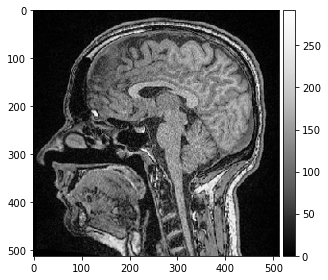

In [8]:
imshow(result[200], cmap="Greys_r", vmin=0)